In [1]:
import sys
import os

current_directory = os.getcwd()

project_directory = os.path.abspath(os.path.join(current_directory, '..'))
if project_directory not in sys.path:
    sys.path.append(project_directory)

import sanity_checks_methods
import ML_algorithms
import pandas as pd
import inconsistencies_util

dataset_path = os.path.join(project_directory, 'dataset/stroke_data.csv')
df = pd.read_csv(dataset_path)

no_stroke_group = df[df['stroke'] == 0]
stroke_group = df[df['stroke'] == 1]

group_size = 5000

sampled_no_stroke_group = no_stroke_group.sample(n=group_size, random_state=42)
sampled_stroke_group = stroke_group.sample(n=group_size, random_state=42)

df = pd.concat([sampled_no_stroke_group,sampled_stroke_group])
df = df.dropna()
df_to_test = df.copy()


df_to_test = sanity_checks_methods.drop_inconsistencies(df_to_test)
df = sanity_checks_methods.drop_inconsistencies(df)

adding 10% of inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 0
Percentage of inconsistencies in age and married features: 0.00%
Number of inconsistencies in age and workType features: 0
Percentage of inconsistencies in age and workType features: 0.00%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
0.0

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 951
Percentage of inconsistencies in age and married features: 10.00%
Number of inconsistencies in age and workType features: 951
Percentage of inconsistencies in age and workType features: 10.00%
Number of abnormal values: 951
Percentage of abnormal values: 10.00%

TOTAL INCONSISTENCY PERCENTAGE
29.993692178301096

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
              precis

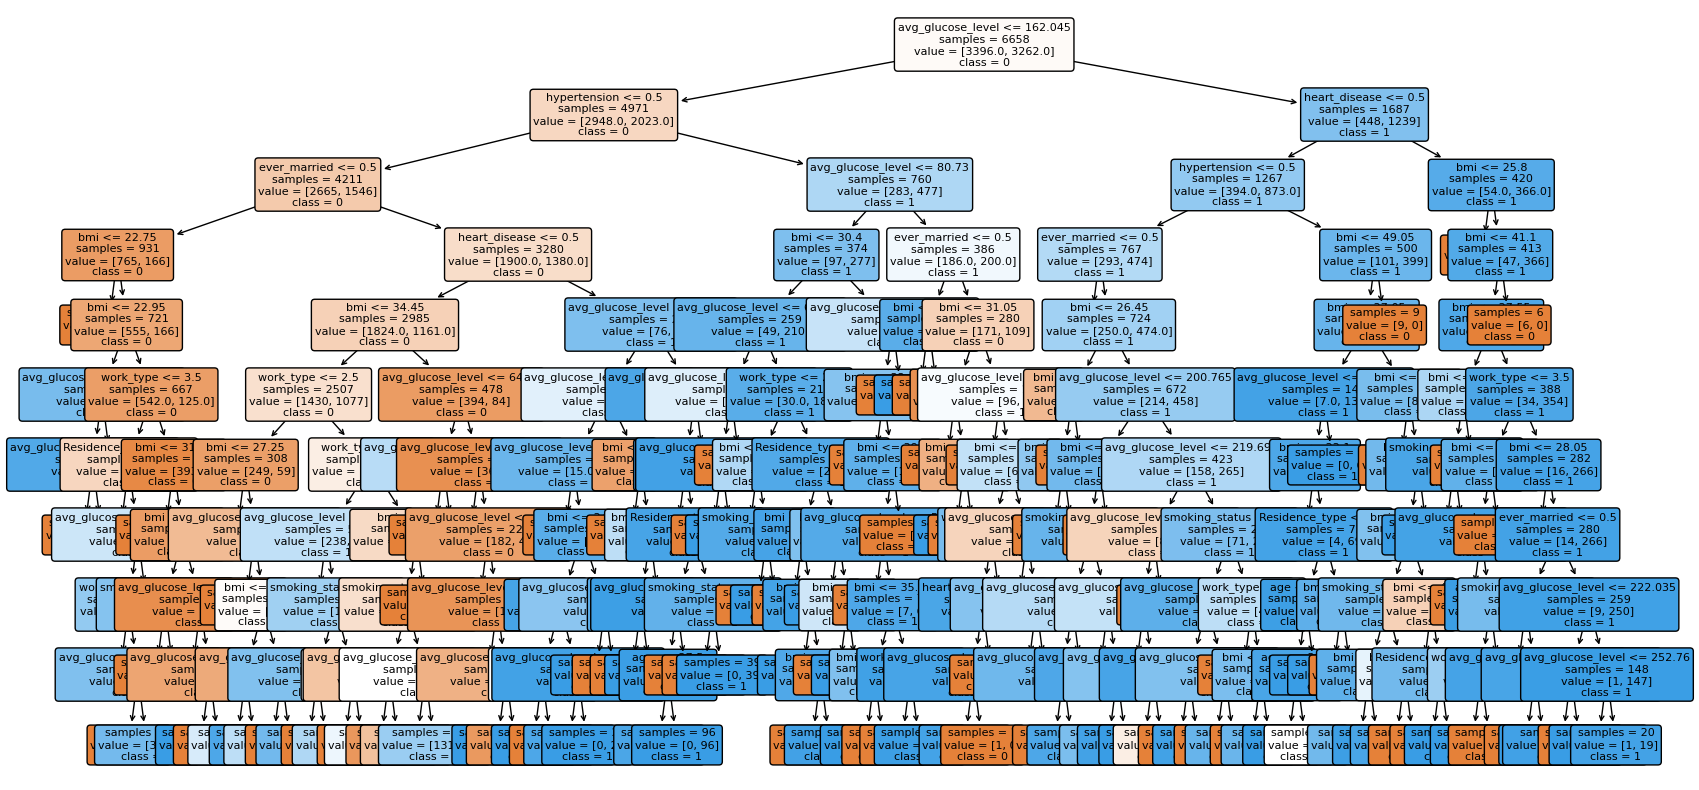

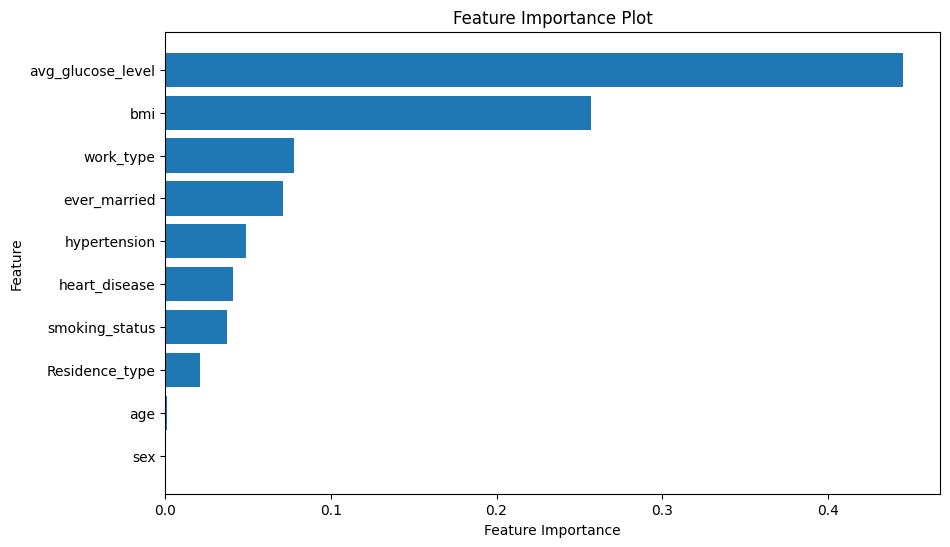

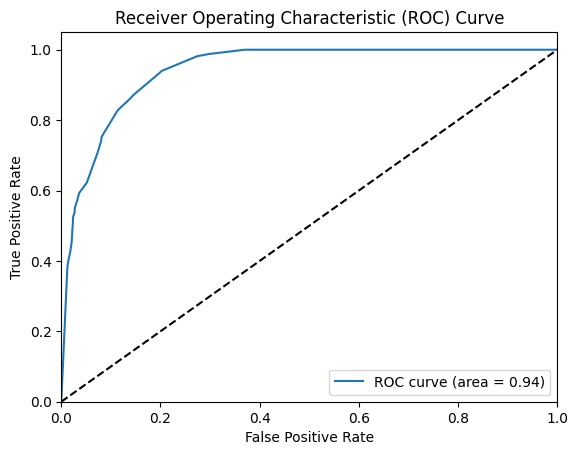

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9420153300398353
Accuracy for each fold: [0.8496503496503497, 0.8111888111888111, 0.7797202797202797, 0.8216783216783217, 0.7789473684210526, 0.7929824561403509, 0.7894736842105263, 0.8385964912280702, 0.8, 0.8245614035087719]
Mean accuracy: 0.8086799165746534
95% confidence interval: (0.7911340263157022, 0.8262258068336047)


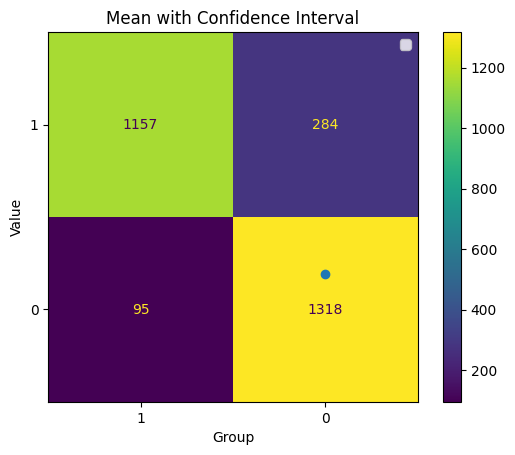


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1441
           1       0.71      0.58      0.64      1413

    accuracy                           0.68      2854
   macro avg       0.68      0.68      0.67      2854
weighted avg       0.68      0.68      0.67      2854



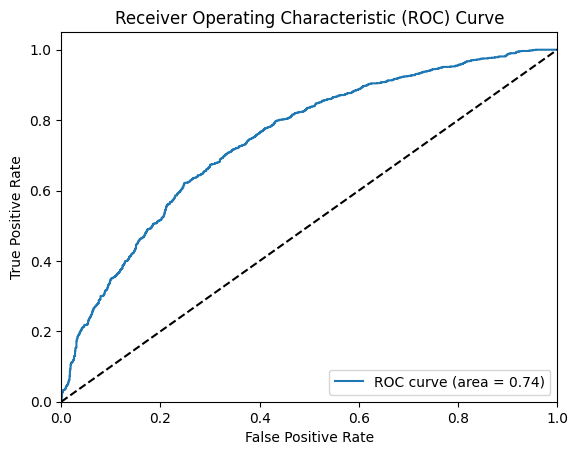

AUC Score: 0.7449041884788469


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6503496503496503, 0.6503496503496503, 0.7167832167832168, 0.6958041958041958, 0.6877192982456141, 0.6385964912280702, 0.6947368421052632, 0.6035087719298246, 0.6280701754385964, 0.6421052631578947]
Mean accuracy: 0.6608023555391976
95% confidence interval: (0.6350647382273062, 0.686539972851089)


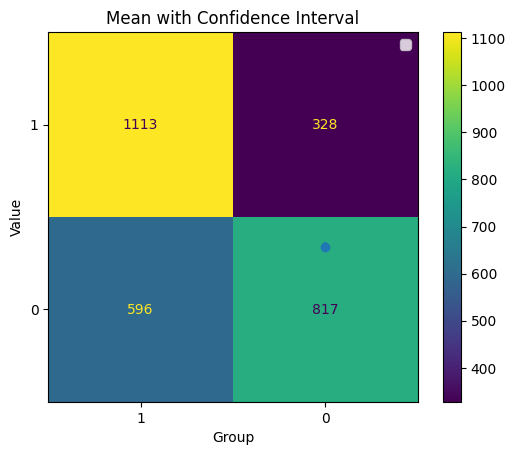


ORIGINAL VALUES RESTORED


In [2]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 10)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_10_dt, y_test_10_dt, decision_tree = ML_algorithms.model_dt(df, df_to_test)
mean_accuracy_dt_10, confidence_interval_dt_10 = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_10_svm, y_test_10_svm, svm = ML_algorithms.model_svm(df, df_to_test)
mean_accuracy_svm_10, confidence_interval_svm_10 = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 30% of inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 832
Percentage of inconsistencies in age and married features: 8.75%
Number of inconsistencies in age and workType features: 832
Percentage of inconsistencies in age and workType features: 8.75%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
17.493692178301092

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 2853
Percentage of inconsistencies in age and married features: 29.99%
Number of inconsistencies in age and workType features: 2853
Percentage of inconsistencies in age and workType features: 29.99%
Number of abnormal values: 2853
Percentage of abnormal values: 29.99%

TOTAL INCONSISTENCY PERCENTAGE
89.98107653490328

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:

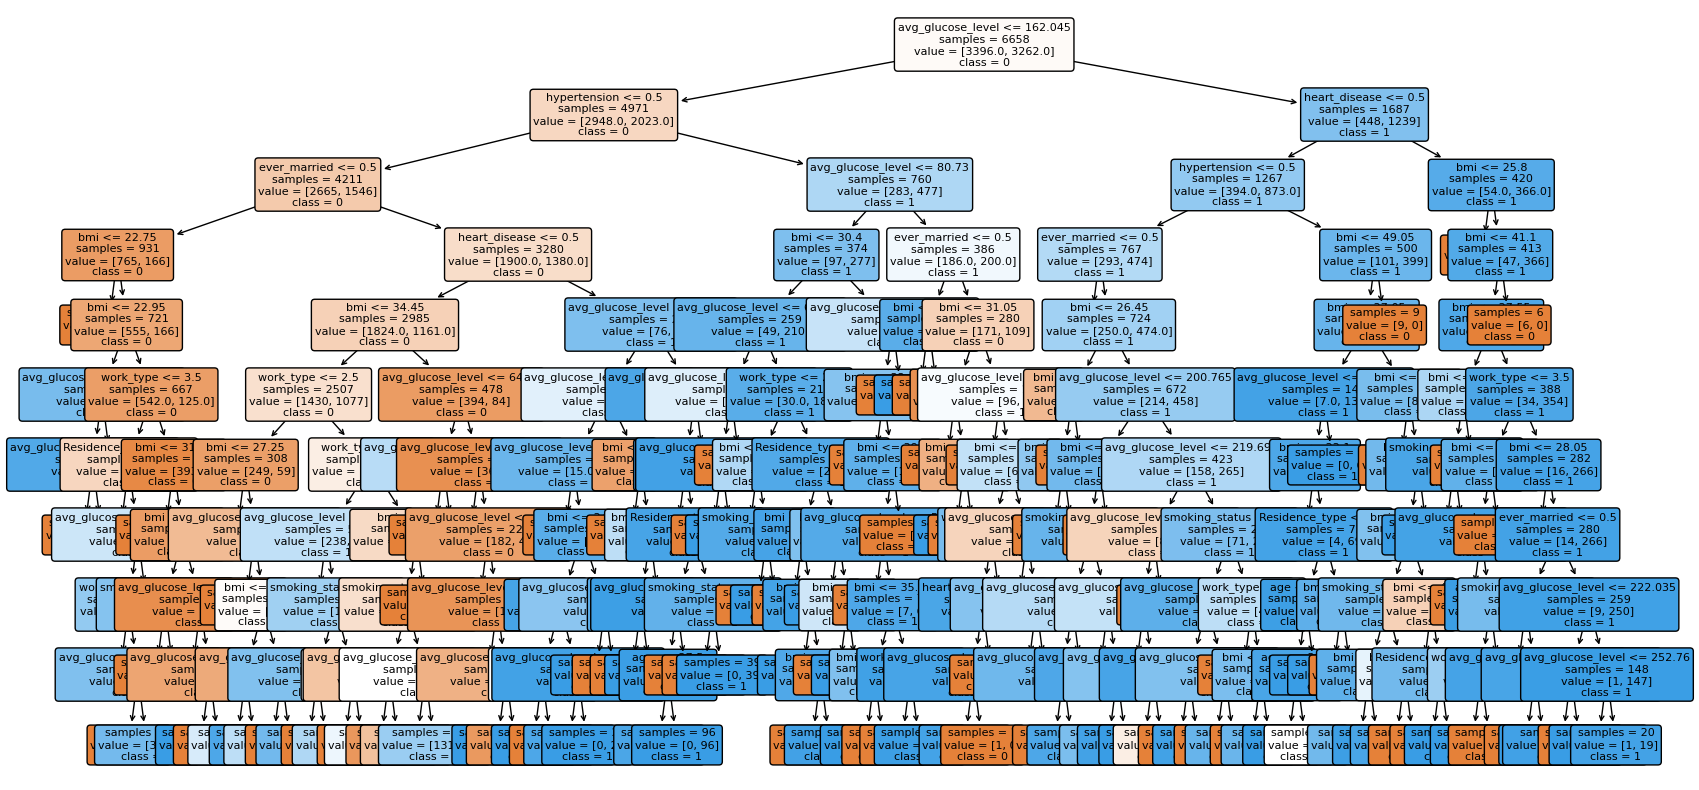

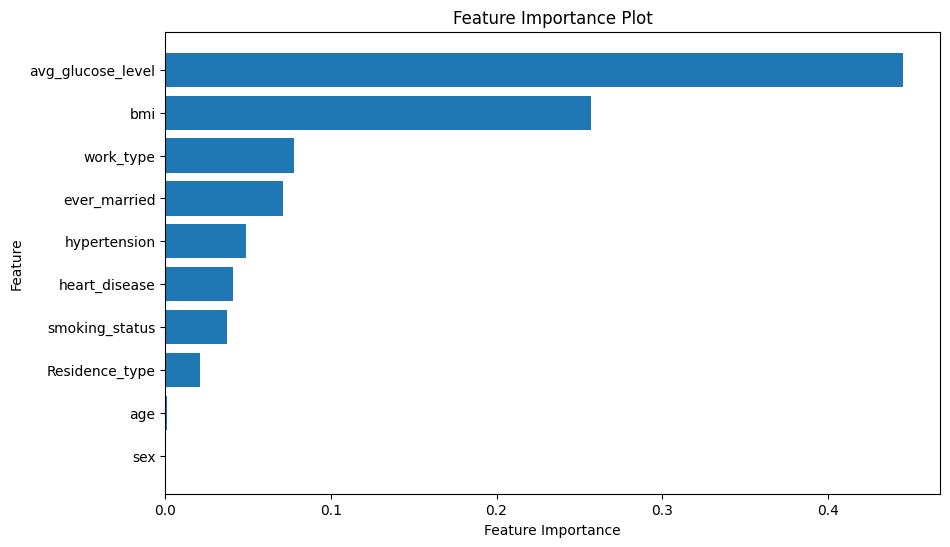

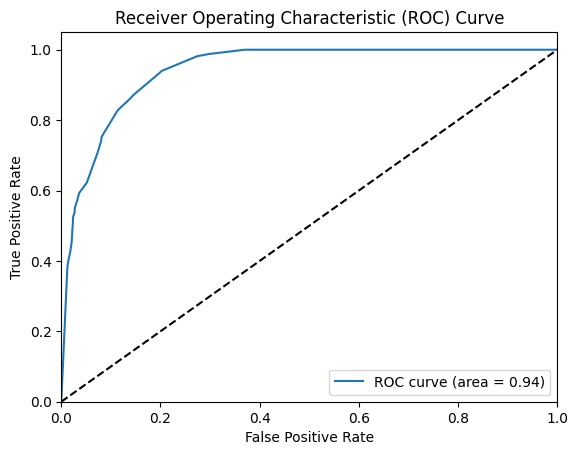

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9420153300398353
Accuracy for each fold: [0.8181818181818182, 0.8286713286713286, 0.7552447552447552, 0.7937062937062938, 0.8245614035087719, 0.8175438596491228, 0.8421052631578947, 0.8175438596491228, 0.8456140350877193, 0.7894736842105263]
Mean accuracy: 0.8132646301067353
95% confidence interval: (0.7938649629291851, 0.8326642972842856)


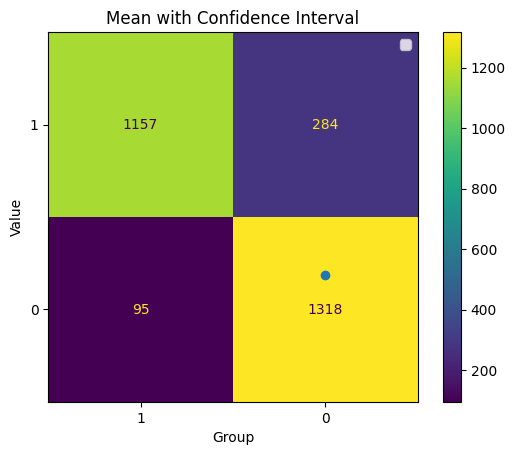


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.65      0.77      0.71      1441
           1       0.71      0.58      0.64      1413

    accuracy                           0.68      2854
   macro avg       0.68      0.68      0.67      2854
weighted avg       0.68      0.68      0.67      2854



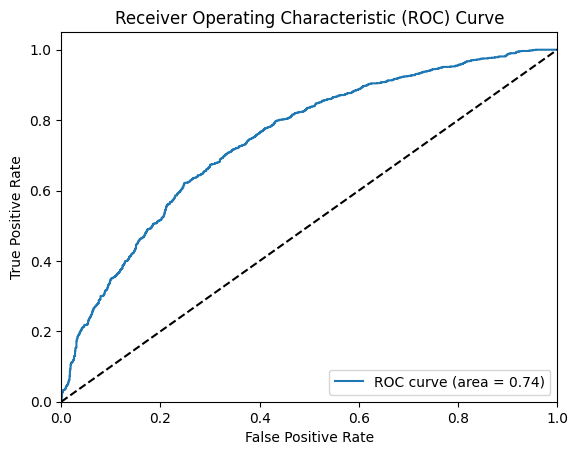

AUC Score: 0.7449041884788469


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6398601398601399, 0.6503496503496503, 0.6538461538461539, 0.6573426573426573, 0.6456140350877193, 0.6456140350877193, 0.6736842105263158, 0.6421052631578947, 0.6456140350877193, 0.7333333333333333]
Mean accuracy: 0.6587363513679304
95% confidence interval: (0.6387378479681265, 0.6787348547677343)


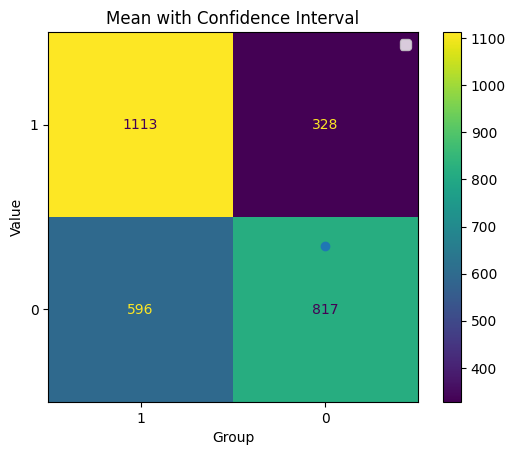


ORIGINAL VALUES RESTORED


In [3]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 30)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_30_dt, y_test_30_dt, decision_tree = ML_algorithms.model_dt(df, df_to_test)
mean_accuracy_dt_30, confidence_interval_dt_30 = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_30_svm, y_test_30_svm, svm = ML_algorithms.model_svm(df, df_to_test)
mean_accuracy_svm_30, confidence_interval_svm_30 = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 50% inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 2538
Percentage of inconsistencies in age and married features: 26.68%
Number of inconsistencies in age and workType features: 2538
Percentage of inconsistencies in age and workType features: 26.68%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
53.36417157275021

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 4756
Percentage of inconsistencies in age and married features: 50.00%
Number of inconsistencies in age and workType features: 4756
Percentage of inconsistencies in age and workType features: 50.00%
Number of abnormal values: 4756
Percentage of abnormal values: 50.00%

TOTAL INCONSISTENCY PERCENTAGE
150.0

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
        

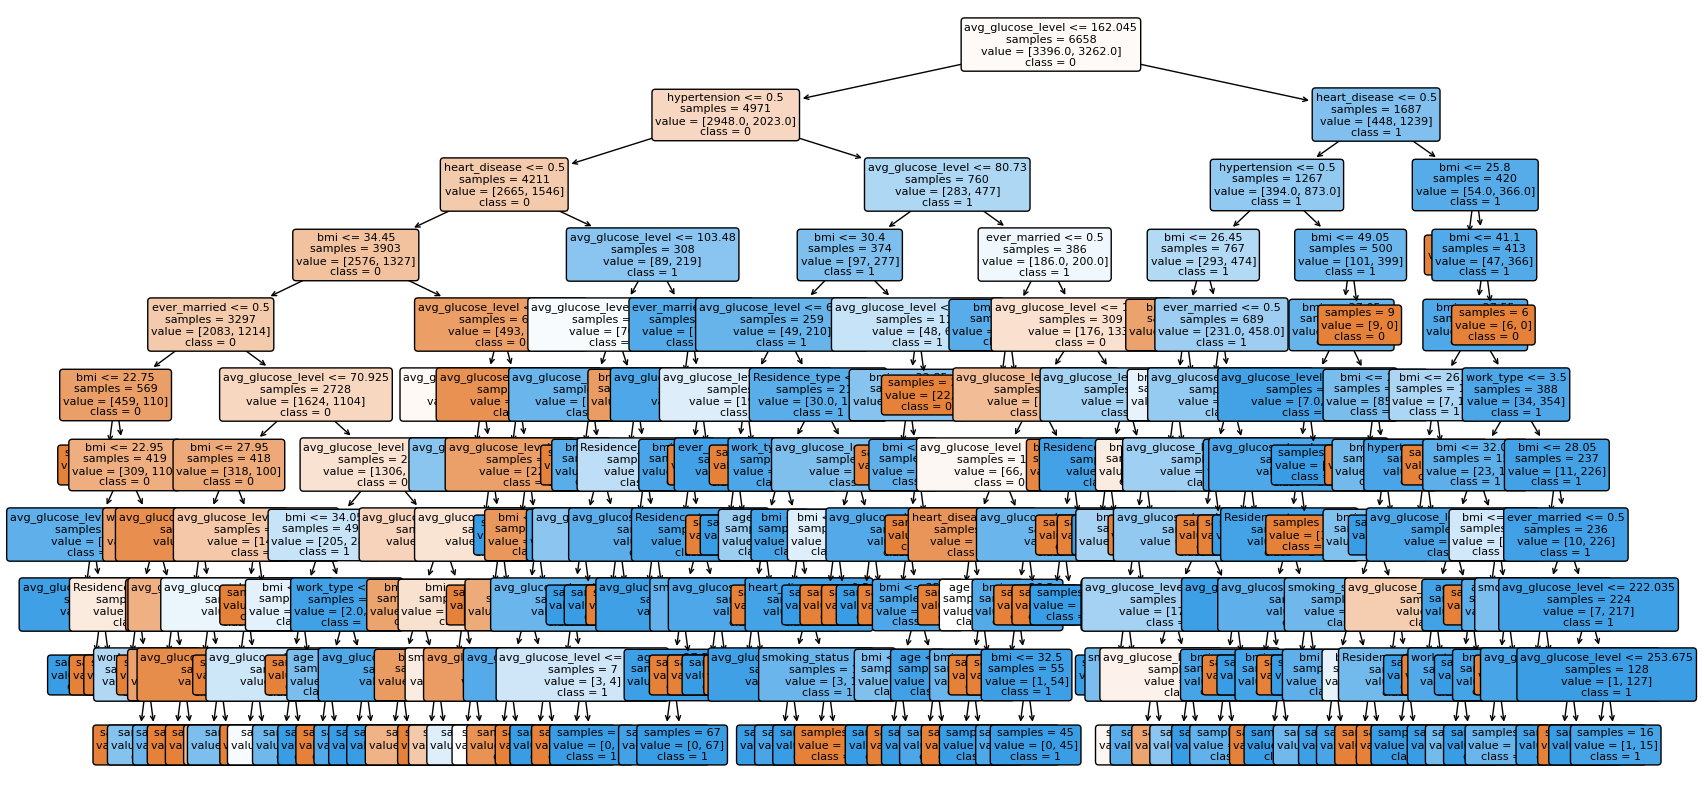

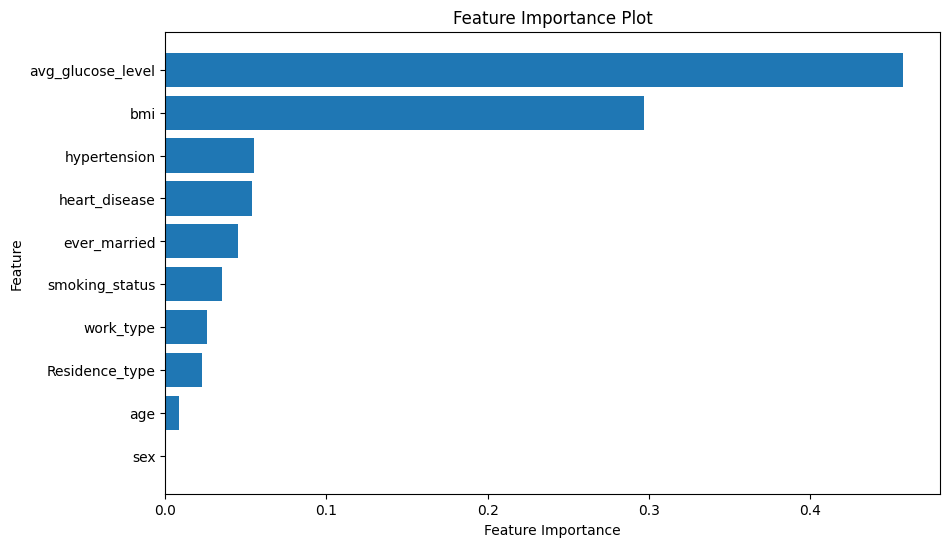

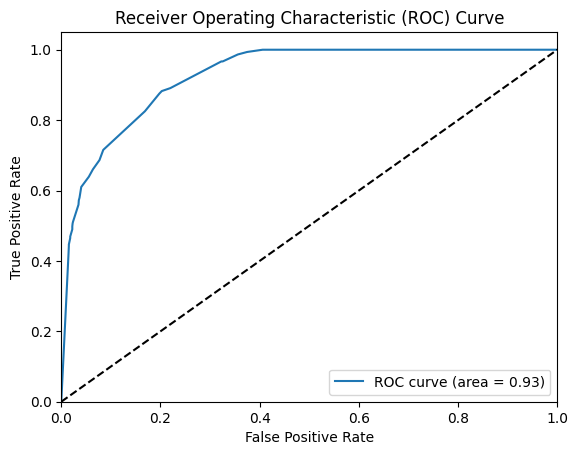

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


AUC Score: 0.9264389899873928
Accuracy for each fold: [0.8461538461538461, 0.8006993006993007, 0.8111888111888111, 0.7972027972027972, 0.8350877192982457, 0.8070175438596491, 0.8, 0.8315789473684211, 0.8035087719298246, 0.7719298245614035]
Mean accuracy: 0.8104367562262299
95% confidence interval: (0.7948873774473568, 0.825986135005103)


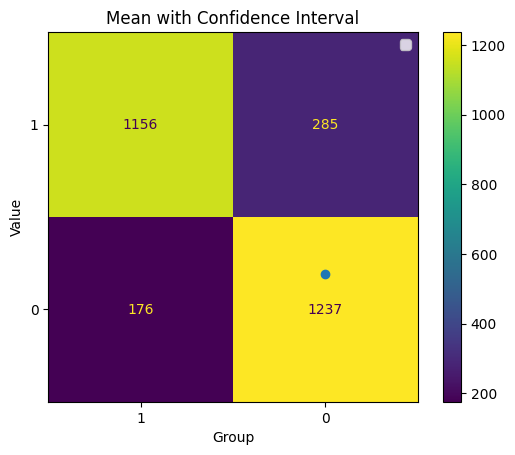


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Original Test Set:
              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1441
           1       0.73      0.44      0.55      1413

    accuracy                           0.64      2854
   macro avg       0.67      0.64      0.63      2854
weighted avg       0.67      0.64      0.63      2854



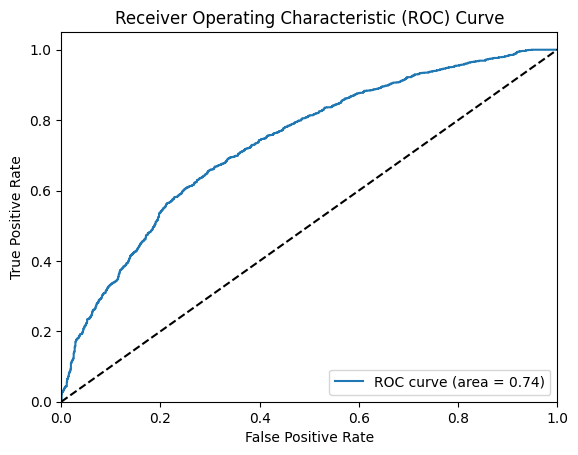

AUC Score: 0.7354686555347808


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.6503496503496503, 0.6013986013986014, 0.6398601398601399, 0.6888111888111889, 0.6526315789473685, 0.6842105263157895, 0.7017543859649122, 0.6456140350877193, 0.6736842105263158, 0.6491228070175439]
Mean accuracy: 0.658743712427923
95% confidence interval: (0.6378964234069624, 0.6795910014488835)


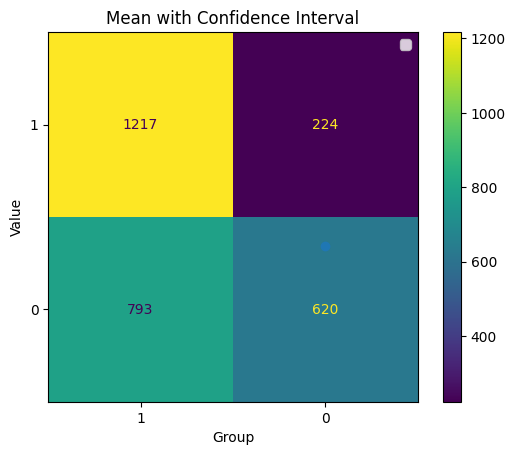


ORIGINAL VALUES RESTORED


In [4]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 50)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_50_dt, y_test_50_dt, decision_tree = ML_algorithms.model_dt(df, df_to_test)
mean_accuracy_dt_50, confidence_interval_dt_50 = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_50_svm, y_test_50_svm, svm = ML_algorithms.model_svm(df, df_to_test)
mean_accuracy_svm_50, confidence_interval_svm_50 = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test)  

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

adding 100% inconsistencies

BEFORE INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 4205
Percentage of inconsistencies in age and married features: 44.21%
Number of inconsistencies in age and workType features: 4205
Percentage of inconsistencies in age and workType features: 44.21%
All values in age feature are correct.

TOTAL INCONSISTENCY PERCENTAGE
88.41463414634147

 AFTER INCONSISTENCIES INTRODUCTION
-------------------------------------
Number of inconsistencies in age and married features: 9512
Percentage of inconsistencies in age and married features: 100.00%
Number of inconsistencies in age and workType features: 9512
Percentage of inconsistencies in age and workType features: 100.00%
Number of abnormal values: 9512
Percentage of abnormal values: 100.00%

TOTAL INCONSISTENCY PERCENTAGE
300.0

 DECISION TREE PREDICTIONS AND RESULTS
---------------------------------------------------
Classification Report on Test Set - original:
     

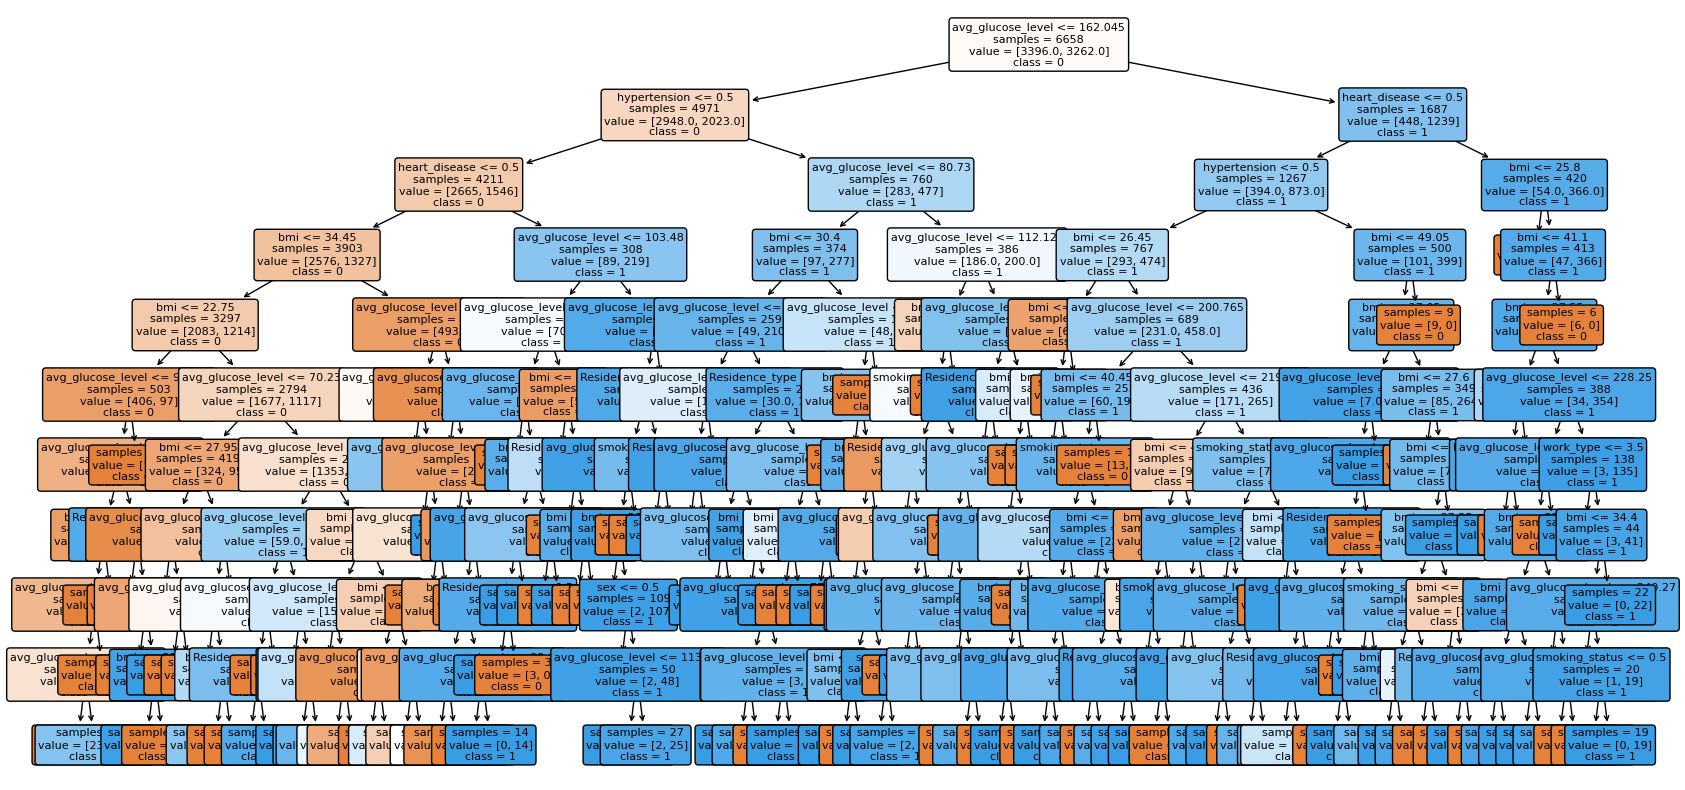

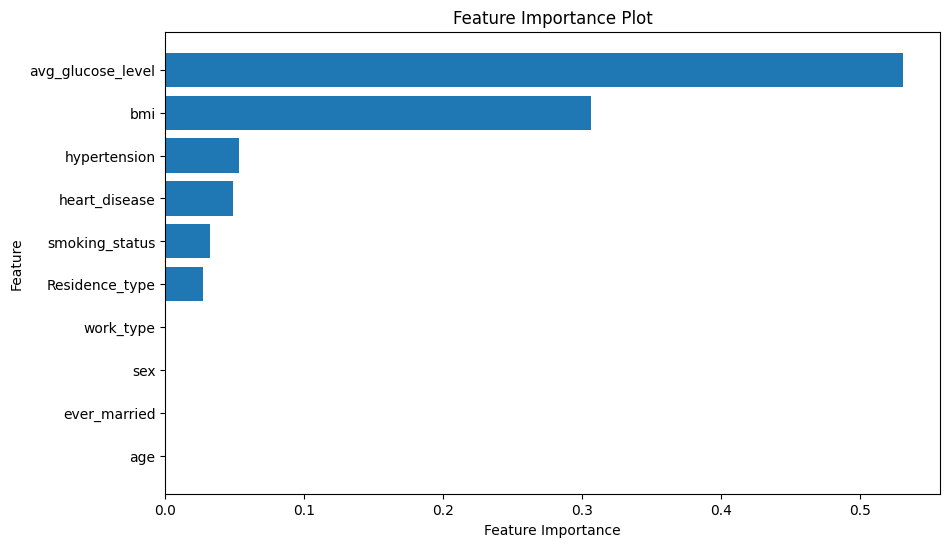

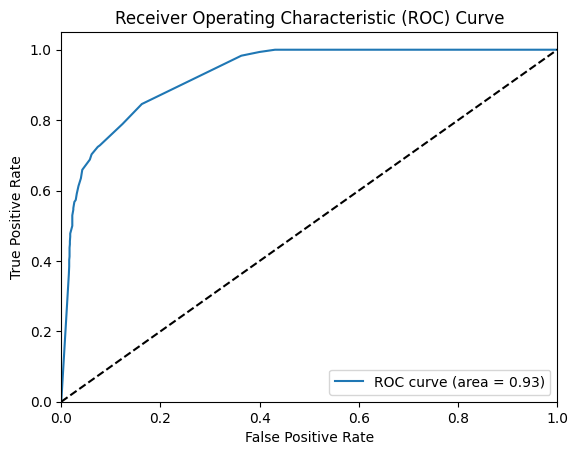

AUC Score: 0.9290147058173508


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Accuracy for each fold: [0.8531468531468531, 0.8111888111888111, 0.7937062937062938, 0.8041958041958042, 0.8245614035087719, 0.8035087719298246, 0.7578947368421053, 0.8245614035087719, 0.8, 0.7684210526315789]
Mean accuracy: 0.8041185130658814
95% confidence interval: (0.7844172566250649, 0.823819769506698)


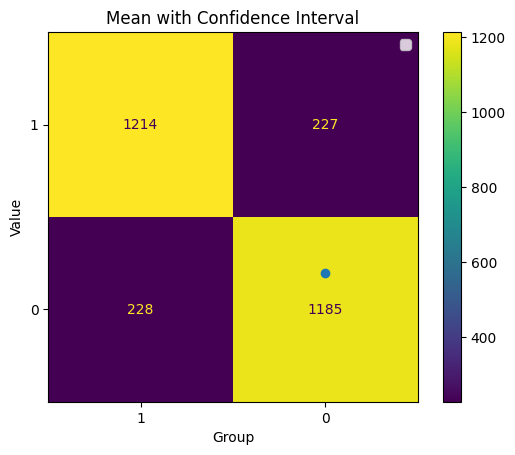


 PRINT SVM PREDICTIONS AND RESULTS
---------------------------------------------------


ValueError: Found unknown categories [0, 1] in column 0 during transform

In [5]:
print('BEFORE INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

original_values = inconsistencies_util.introduce_inconsistencies(df, 100)

print('\n AFTER INCONSISTENCIES INTRODUCTION')
print('-------------------------------------')
inconsistencies_util.visualize_inconsistencies(df)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_100_dt, y_test_100_dt, decision_tree = ML_algorithms.model_dt(df, df_to_test)
mean_accuracy_dt_100, confidence_interval_dt_100 = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_100_svm, y_test_100_svm, svm = ML_algorithms.model_svm(df, df_to_test)
mean_accuracy_svm_100, confidence_interval_svm_100 = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

df = inconsistencies_util.restore_original_values(df, original_values)
print('\nORIGINAL VALUES RESTORED')

Dropping inconsistencies features

In [ ]:
# Drop the columns from the training data
df_train = df.drop(['age', 'work_type', 'ever_married'], axis=1)

# Drop the columns from the test data
df_test = df_to_test.drop(['age', 'work_type', 'ever_married'], axis=1)

print('\n DECISION TREE PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_drop_dt, y_test_drop_dt, decision_tree = ML_algorithms.model_dt(df, df_to_test)
mean_accuracy_dt_drop, confidence_interval_dt_drop = ML_algorithms.k_fold_cross_validation_dt(decision_tree,df_to_test)
    
print('\n PRINT SVM PREDICTIONS AND RESULTS')
print('---------------------------------------------------')
y_pred_prob_drop_svm, y_test_drop_svm, svm = ML_algorithms.model_svm(df, df_to_test)
mean_accuracy_svm_drop, confidence_interval_svm_drop = ML_algorithms.k_fold_cross_validation_dt(svm,df_to_test) 

## Conclusion

### ROC CURVE - Decision Tree

In [ ]:
roc_results = [
    (y_pred_prob_10_dt, y_test_10_dt, 'Inconsistence - 10%'),
    (y_pred_prob_30_dt, y_test_30_dt, 'Inconsistence - 30%'),
    (y_pred_prob_50_dt, y_test_50_dt, 'Inconsistence - 50%'),
    (y_pred_prob_100_dt, y_test_100_dt, 'Inconsistence - 100%')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### ROC Curve - Support Vector Machine

In [ ]:
roc_results = [
    (y_pred_prob_10_svm, y_test_10_svm, 'Inconsistence - 10%'),
    (y_pred_prob_30_svm, y_test_30_svm, 'Inconsistence - 30%'),
    (y_pred_prob_50_svm, y_test_50_svm, 'Inconsistence - 50%'),
    (y_pred_prob_100_svm, y_test_100_svm, 'Inconsistence - 100%')
]

# Plot ROC curves
ML_algorithms.plot_roc_curve_conclusion_with_results(roc_results)

### Confidence Interval - Decision Tree

In [ ]:
model_results = [
    ('Inconsistence - 10%', mean_accuracy_dt_10, confidence_interval_dt_10),
    ('Inconsistence - 30%', mean_accuracy_dt_30, confidence_interval_dt_30),
    ('Inconsistence - 50%', mean_accuracy_dt_50, confidence_interval_dt_50),
    ('Inconsistence - 100%', mean_accuracy_dt_100, confidence_interval_dt_100)
]
ML_algorithms.plot_confidence_intervals(model_results)

### Confidence Interval - Support Vector Machine

In [ ]:
model_results = [
    ('Inconsistence - 10%', mean_accuracy_svm_10, confidence_interval_svm_10),
    ('Inconsistence - 30%', mean_accuracy_dt_30, confidence_interval_svm_30),
    ('Inconsistence - 50%', mean_accuracy_svm_50, confidence_interval_svm_50),
    ('Inconsistence - 100%', mean_accuracy_svm_100, confidence_interval_svm_100)
]
ML_algorithms.plot_confidence_intervals(model_results)